# COMPARISION OF EUROPE'S TOP 5 FOOTBALL LEAGUE STADIUMS

### We will compare Europe's top Stadiums on the basis of two parameters: 

### 1. On the basis of Hospitals nearby.
### 2. On the basis of Hotels, Restaurants, Pubs and Bars nearby.

#### First let's import all the libraries we gonna need for this project.

In [2]:
import pandas as pd
import numpy as np
!pip install BeautifulSoup4
!pip install lxml
!pip install html5lib
from pandas.io.html import read_html

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.7.0 --yes
import folium # map rendering library
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries imported.')

print('Everything Imported')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.
Everything Imported


### Scrap Data from Wikipedia pages of Top 5 European Football Leagues and Clean it

##### Scrap Data of all English Premier League Stadiums for 2019-20 season

In [17]:
wikiepl = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League'
table = read_html(wikiepl, attrs={'class':'wikitable sortable'})

In [18]:
eplstadiums = table[0]
eplstadiums

,Team,Location,Stadium,Capacity
0,Arsenal,London (Holloway),Emirates Stadium,60260
1,Aston Villa,Birmingham,Villa Park,"42,785[8]"
2,Bournemouth,Bournemouth,Dean Court,11364
3,Brighton & Hove Albion,Brighton,Falmer Stadium,30666
4,Burnley,Burnley,Turf Moor,21944
5,Chelsea,London (Fulham),Stamford Bridge,41631
6,Crystal Palace,London (Selhurst),Selhurst Park,26047
7,Everton,Liverpool (Walton),Goodison Park,39221
8,Leicester City,Leicester,King Power Stadium,32312
9,Liverpool,Liverpool (Anfield),Anfield,54074


In [19]:
eplstadiums.Capacity = eplstadiums.Capacity.str.split('[').str[0]

In [20]:
eplstadiums.Location = eplstadiums.Location.str.split('(').str[0]

In [22]:
eplstadiums.rename(columns={'Team':'Club'}, inplace = True)
eplstadiums = eplstadiums[['Club','Stadium','Location','Capacity']]

In [23]:
eplstadiums.sort_values('Capacity', ascending = False, inplace = True)
eplstadiums.reset_index(drop = True, inplace = True)

In [26]:
eplstadiums.to_csv('EPL Cleaned Data 2019-20.csv', columns = eplstadiums.columns)

In [28]:
epl2019 = pd.read_csv('EPL Cleaned Data 2019-20.csv')
epl2019.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [34]:
epl2019.iloc[14,1]= 'American Express Community Stadium'

##### Get Geo-Coordinates of all English Premier League Stadiums

In [35]:
epl2019['Latitude'] = ''
epl2019['Longitude'] = ''
lat=[]
long=[]

for a,b in zip(epl2019['Stadium'], epl2019['Location']):
    print(a)
    c = a + ', '+b
    locator = Nominatim(user_agent ='EPL Stadiums Data')
    location = locator.geocode(c)
    latitude = location.latitude
    longitude = location.longitude
    lat.append(latitude)
    long.append(longitude)
epl2019['Latitude'] = lat
epl2019['Longitude'] = long

Old Trafford
Tottenham Hotspur Stadium
Emirates Stadium
London Stadium
City of Manchester Stadium
Anfield
St James' Park
Villa Park
Stamford Bridge
Goodison Park
Bramall Lane
St Mary's Stadium
King Power Stadium
Molineux Stadium
American Express Community Stadium
Carrow Road
Selhurst Park
Turf Moor
Vicarage Road
Dean Court


In [38]:
epl2019.to_csv('EPL Cleaned Data 2019-20.csv', columns = epl2019.columns)

##### Scrap Data of all La Liga Stadiums for 2019-20 season

In [39]:
wikilaliga = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_La_Liga'
table = read_html(wikilaliga, attrs={'class':'wikitable', 'style':'text-align: left;'})

In [40]:
laliga2019 = table[0]
laliga2019.head()

,Team,Location,Stadium,Capacity
0,Alavés,Vitoria-Gasteiz,Mendizorrotza,"19,840[7]"
1,Athletic Bilbao,Bilbao,San Mamés,"53,000[8]"
2,Atlético Madrid,Madrid,Wanda Metropolitano,"68,000[9]"
3,Barcelona,Barcelona,Camp Nou,"99,354[10]"
4,Celta Vigo,Vigo,Abanca-Balaídos,"29,000[11]"


In [41]:
laliga2019.Capacity = laliga2019.Capacity.str.split('[').str[0]

In [42]:
laliga2019.rename(columns={'Team':'Club'}, inplace = True)
laliga2019 = laliga2019[['Club','Stadium','Location', 'Capacity']]

In [44]:
laliga2019.Capacity =laliga2019.Capacity.str.replace(',','')
laliga2019.Capacity = laliga2019.Capacity.astype(int)

In [45]:
laliga2019.sort_values('Capacity', ascending = False, inplace = True)
laliga2019.reset_index(drop = True, inplace = True)

In [210]:
laliga2019

,Club,Stadium,Location,Capacity,Latitude,Longitude,Hospitals
0,Barcelona,Camp Nou,Barcelona,99354,41.380933,2.122912,50
1,Real Madrid,Santiago Bernabéu,Madrid,81044,40.452367,-3.690725,50
2,Atlético Madrid,Wanda Metropolitano,Madrid,68000,40.436210,-3.599483,1
3,Real Betis,Benito Villamarín,Seville,60721,37.356505,-5.981789,16
4,Valencia,Mestalla,Valencia,55000,39.474567,-0.358199,29
5,Athletic Bilbao,San Mames Barria,Bilbao,53000,43.264204,-2.949391,14
6,Sevilla,Ramón Sánchez Pizjuán,Seville,43883,37.384634,-5.971156,28
7,Espanyol,RCDE Stadium,Cornellà de Llobregat,40000,41.347807,2.074802,50
8,Real Sociedad,Anoeta estadioa,San Sebastián,32000,43.301369,-1.973559,8
9,Celta Vigo,Abanca-Balaídos,Vigo,29000,42.211781,-8.739715,4


In [208]:
laliga2019.iloc[10,1]='Estadio Municipal José Zorrilla'
laliga2019.iloc[8,1]= 'Anoeta estadioa'
laliga2019.iloc[11,1]= 'Estadi Ciutat de València'
laliga2019.iloc[16,1]= 'Estadio El Sadar'
laliga2019.iloc[5,1]='San Mames Barria'
laliga2019.iloc[12,1]='Estadi de Son Moix'
laliga2019.iloc[18,1] ='Estadio Municipal Butarque'

#### Get Geo-Coordinates of all La Liga Teams

In [209]:
laliga2019['Latitude'] = ''
laliga2019['Longitude'] = ''
lat=[]
long=[]

for a in laliga2019['Stadium']:
    print(a)
    locator = Nominatim(user_agent ='La Liga Stadiums Data')
    location = locator.geocode(a)
    latitude = location.latitude
    longitude = location.longitude
    lat.append(latitude)
    long.append(longitude)
laliga2019['Latitude'] = lat
laliga2019['Longitude'] = long

Camp Nou
Santiago Bernabéu
Wanda Metropolitano
Benito Villamarín
Mestalla
San Mames Barria
Ramón Sánchez Pizjuán
RCDE Stadium
Anoeta estadioa
Abanca-Balaídos
Estadio Municipal José Zorrilla
Estadi Ciutat de València
Estadi de Son Moix
Estadio de la Cerámica
Mendizorrotza
Nuevo Los Cármenes
Estadio El Sadar
Coliseum Alfonso Pérez
Estadio Municipal Butarque
Ipurua


In [211]:
laliga2019.drop('Hospitals', axis = 1, inplace = True)

In [212]:
laliga2019.to_csv('La Liga Cleaned Data 2019-20.csv', columns = laliga2019.columns)

##### Scrap Data of all Ligue 1 Stadiums for 2019-20 season

In [67]:
wikistadiums = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_Ligue_1'
table = read_html(wikistadiums, attrs={'class':'wikitable sortable'})

In [68]:
ligue12019 = table[0]
ligue12019.drop('2018–19 season', axis = 1, inplace = True)

In [74]:
ligue12019.rename(columns = {'Venue':'Stadium'},inplace = True)

In [70]:
la=[]
lo=[]

for a,b in zip(ligue12019['Stadium'],ligue12019['Location']):
    c = a +', '+b
    print(c)
    locator = Nominatim(user_agent ='Ligue 1 Stadiums Data')
    location = locator.geocode(c)
    latitude = location.latitude
    longitude = location.longitude
    la.append(latitude)
    lo.append(longitude)
ligue12019['Latitude'] = la
ligue12019['Longitude'] = lo

Stade de la Licorne, Amiens
Stade Raymond Kopa, Angers
Matmut Atlantique, Bordeaux
Stade Francis-Le Blé, Brest
Stade Gaston Gérard, Dijon
Stade Pierre-Mauroy, Villeneuve-d'Ascq
Groupama Stadium, Décines-Charpieu
Orange Vélodrome, Marseille
Stade Saint-Symphorien, Metz
Stade Louis II, Monaco
Stade de la Mosson, Montpellier
Stade de la Beaujoire, Nantes
Allianz Riviera, Nice
Stade des Costières, Nîmes
Parc des Princes, Paris
Stade Auguste Delaune, Reims
Roazhon Park, Rennes
Stade Geoffroy-Guichard, Saint-Étienne
Stade de la Meinau, Strasbourg
Stadium Municipal, Toulouse


In [71]:
ligue12019 = ligue12019[['Club','Stadium','Location','Capacity','Latitude','Longitude']]
ligue12019.sort_values('Capacity', ascending = False, inplace = True)
ligue12019.reset_index(drop = True, inplace = True)

In [73]:
ligue12019.to_csv('Ligue 1 Cleaned Data 2019-20.csv', columns = ligue12019.columns)

##### Scrap Data of all Bundesliga Stadiums for 2019-20 season

In [75]:
wikistadiumsBundesliga = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_Bundesliga'
table = read_html(wikistadiumsBundesliga, attrs={'class':'wikitable sortable'})

In [76]:
bundesliga2019 = table[0]

In [77]:
bundesliga2019.head(1)

,Team,Location,Stadium,Capacity,Ref.
0,FC Augsburg,Augsburg,WWK Arena,30660,[4]


In [78]:
bundesliga2019.drop('Ref.', axis =1, inplace = True)

In [79]:
bundesliga2019.rename(columns = {'Team':'Club'}, inplace = True)

In [80]:
bundesliga2019 = bundesliga2019[['Club','Stadium','Location','Capacity']]

In [81]:
bundesliga2019.sort_values('Capacity', ascending = False, inplace = True)

In [82]:
bundesliga2019.reset_index(drop = True, inplace = True)

In [86]:
bundesliga2019.iloc[9,1] = 'Weserstadion'

In [87]:
latbun=[]
longbun=[]

for a,b in zip(bundesliga2019['Stadium'],bundesliga2019['Location']):
    c = a + ', ' + b
    print(c)
    locator = Nominatim(user_agent ='Bundesliga Stadiums Data')
    location = locator.geocode(c)
    latitude = location.latitude
    longitude = location.longitude
    latbun.append(latitude)
    longbun.append(longitude)
bundesliga2019['Latitude'] = latbun
bundesliga2019['Longitude'] = longbun

Signal Iduna Park, Dortmund
Allianz Arena, Munich
Olympiastadion, Berlin
Veltins-Arena, Gelsenkirchen
Borussia-Park, Mönchengladbach
Merkur Spiel-Arena, Düsseldorf
Commerzbank-Arena, Frankfurt
RheinEnergieStadion, Cologne
Red Bull Arena, Leipzig
Weserstadion, Bremen
Opel Arena, Mainz
WWK Arena, Augsburg
BayArena, Leverkusen
PreZero Arena, Sinsheim
Volkswagen Arena, Wolfsburg
Schwarzwald-Stadion, Freiburg im Breisgau
Stadion An der Alten Försterei, Berlin
Benteler-Arena, Paderborn


In [89]:
bundesliga2019.to_csv('Bundesliga Cleaned Data 2019-20.csv', columns = bundesliga2019.columns)

##### Scrap Data of all Serie A Stadiums for 2019-20 season

In [90]:
wikistadiumsSerieA = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_Serie_A'
table = read_html(wikistadiumsSerieA, attrs={'class':'wikitable sortable'})

In [91]:
seriea2019 = table[0]

In [92]:
seriea2019.head(1)

,Team,Home city,Stadium,Capacity,2018–19 season
0,Atalanta,Bergamo,Gewiss Stadium,21300,3rd in Serie A


In [93]:
seriea2019.drop('2018–19 season', axis = 1, inplace =True)

In [94]:
seriea2019.rename(columns = {'Team': 'Club', 'Home city':'Location'}, inplace = True)

In [95]:
seriea2019 = seriea2019[['Club','Stadium','Location','Capacity']]

In [96]:
seriea2019.sort_values('Capacity', ascending = False, inplace = True)

In [97]:
seriea2019.reset_index(drop = True, inplace = True)

In [118]:
seriea2019.iloc[11,1] = 'Stadio Ettore Giardiniero - Via del Mare'
seriea2019.iloc[5,1] ='Stadio Giovanni Berta'

In [119]:
latser=[]
longser=[]

for a,b in zip(seriea2019['Stadium'],seriea2019['Location']):
    c = a + ', ' + b
    print(c)
    locator = Nominatim(user_agent ='Serie A Stadiums Data')
    location = locator.geocode(a)
    latitude = location.latitude
    longitude = location.longitude
    latser.append(latitude)
    longser.append(longitude)
seriea2019['Latitude'] = latser
seriea2019['Longitude'] = longser

San Siro, Milan
San Siro, Milan
Stadio Olimpico, Rome
Stadio Olimpico, Rome
Stadio San Paolo, Naples
Stadio Giovanni Berta, Florence
Allianz Stadium, Turin
Stadio Marc'Antonio Bentegodi, Verona
Stadio Renato Dall'Ara, Bologna
Stadio Luigi Ferraris, Genoa
Stadio Luigi Ferraris, Genoa
Stadio Ettore Giardiniero - Via del Mare, Lecce
Stadio Olimpico Grande Torino, Turin
Stadio Ennio Tardini, Parma
Stadio Friuli, Udine
Mapei Stadium – Città del Tricolore (Reggio Emilia), Sassuolo
Gewiss Stadium, Bergamo
Stadio Mario Rigamonti, Brescia
Sardegna Arena, Cagliari
Stadio Paolo Mazza, Ferrara


In [121]:
seriea2019.to_csv('Serie A Cleaned Data 2019-20.csv', columns = seriea2019.columns)

#### Merge all leagues data so far into one CSV file

In [251]:
top5europe = pd.concat([epl2019,laliga2019,bundesliga2019,seriea2019,ligue12019], sort = False)

### Load League Tables

In [2]:
epl2019 = pd.read_csv('EPL Cleaned Data 2019-20.csv')
epl2019.drop('Unnamed: 0',1,inplace = True)
laliga2019 = pd.read_csv('La Liga Cleaned Data 2019-20.csv')
laliga2019.drop('Unnamed: 0',1,inplace = True)
ligue12019 = pd.read_csv('Ligue 1 Cleaned Data 2019-20.csv')
ligue12019.drop('Unnamed: 0',1,inplace = True)
seriea2019 = pd.read_csv('Serie A Cleaned Data 2019-20.csv')
seriea2019.drop('Unnamed: 0',1,inplace = True)
bundesliga2019 = pd.read_csv('Bundesliga Cleaned Data 2019-20.csv')
bundesliga2019.drop('Unnamed: 0',1,inplace = True)

# Foursquare API

In [122]:
CLIENT_ID = 'PBEJO0ENPM4XXVANUH02NIDL4IJC4PSSH1QFBUFQ0DJRVTVG' # your Foursquare ID
CLIENT_SECRET = 'PKIGPFC4LDXYTZSZZF2CYTOQRSXXT2RUVA23OJMN22N2QGF5' # your Foursquare Secret
VERSION = '20190707' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PBEJO0ENPM4XXVANUH02NIDL4IJC4PSSH1QFBUFQ0DJRVTVG
CLIENT_SECRET:PKIGPFC4LDXYTZSZZF2CYTOQRSXXT2RUVA23OJMN22N2QGF5


### Function to get Nearby Hospitals

In [127]:
def getNearbyVenues(names, latitudes, longitudes, search_query = 'Hospital',radius=2500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, long in zip(names, latitudes, longitudes):
#        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            long, 
            VERSION, 
            search_query, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            long, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Club', 
                  'Club Latitude', 
                  'Club Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [129]:
def getNearbyVenuesGER(names, latitudes, longitudes, search_query = 'das Hospital',radius=2500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, long in zip(names, latitudes, longitudes):
#        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            long, 
            VERSION, 
            search_query, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            long, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Club', 
                  'Club Latitude', 
                  'Club Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [130]:
def getNearbyVenuesITA(names, latitudes, longitudes, search_query = 'ospedale',radius=2500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, long in zip(names, latitudes, longitudes):
#        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            long, 
            VERSION, 
            search_query, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            long, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Club', 
                  'Club Latitude', 
                  'Club Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [131]:
def getNearbyVenuesFR(names, latitudes, longitudes, search_query = 'hôpital',radius=2500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, long in zip(names, latitudes, longitudes):
#        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            long, 
            VERSION, 
            search_query, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            long, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Club', 
                  'Club Latitude', 
                  'Club Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [132]:
eplHospitals = getNearbyVenues(names = epl2019['Club'], latitudes = epl2019['Latitude'] , longitudes = epl2019['Longitude'] )

In [213]:
laligaHospitals = getNearbyVenues(names = laliga2019['Club'], latitudes = laliga2019['Latitude'] , longitudes = laliga2019['Longitude'] )

In [134]:
bundesligaHospitals = getNearbyVenuesGER(names = bundesliga2019['Club'], latitudes = bundesliga2019['Latitude'] , longitudes = bundesliga2019['Longitude'] )

In [135]:
serieaHospitals = getNearbyVenuesITA(names = seriea2019['Club'], latitudes = seriea2019['Latitude'] , longitudes = seriea2019['Longitude'] )

In [136]:
ligue1Hospitals = getNearbyVenuesFR(names = ligue12019['Club'], latitudes = ligue12019['Latitude'] , longitudes = ligue12019['Longitude'] )

#### Number of Hospitals nearby each Club

In [137]:
ligue1count = pd.DataFrame(ligue1Hospitals.Club.value_counts())
ligue1count.reset_index(inplace = True)
ligue1count.columns = ['Club','Hospitals']

In [138]:
ligue12019['Hospitals'] = ''
for a in ligue12019.Club.index:
    for b in ligue1count.Club.index:
        if ligue12019.loc[a, 'Club'] == ligue1count.loc[b,'Club']:
            ligue12019.loc[a,'Hospitals'] = ligue1count.loc[b,'Hospitals']

In [139]:
eplcount = pd.DataFrame(eplHospitals.Club.value_counts())
eplcount.reset_index(inplace = True)
eplcount.columns = ['Club','Hospitals']

In [140]:
epl2019['Hospitals'] = ''
for a in epl2019.Club.index:
    for b in eplcount.Club.index:
        if epl2019.loc[a, 'Club'] == eplcount.loc[b,'Club']:
            epl2019.loc[a,'Hospitals'] = eplcount.loc[b,'Hospitals']

In [141]:
bundesligacount = pd.DataFrame(bundesligaHospitals.Club.value_counts())
bundesligacount.reset_index(inplace = True)
bundesligacount.columns = ['Club','Hospitals']

In [142]:
bundesliga2019['Hospitals'] = ''
for a in bundesliga2019.Club.index:
    for b in bundesligacount.Club.index:
        if bundesliga2019.loc[a, 'Club'] == bundesligacount.loc[b,'Club']:
            bundesliga2019.loc[a,'Hospitals'] = bundesligacount.loc[b,'Hospitals']

In [214]:
laligacount = pd.DataFrame(laligaHospitals.Club.value_counts())
laligacount.reset_index(inplace = True)
laligacount.columns = ['Club','Hospitals']

In [215]:
laliga2019['Hospitals'] = ''
for a in laliga2019.Club.index:
    for b in laligacount.Club.index:
        if laliga2019.loc[a, 'Club'] == laligacount.loc[b,'Club']:
            laliga2019.loc[a,'Hospitals'] = laligacount.loc[b,'Hospitals']

In [454]:
serieacount = pd.DataFrame(serieaHospitals.Club.value_counts())
serieacount.reset_index(inplace = True)
serieacount.columns = ['Club','Hospitals']

In [455]:
seriea2019['Hospitals'] = ''
for a in seriea2019.Club.index:
    for b in serieacount.Club.index:
        if seriea2019.loc[a, 'Club'] == serieacount.loc[b,'Club']:
            seriea2019.loc[a,'Hospitals'] = serieacount.loc[b,'Hospitals']

#### Save Hospital Data to CSV File

In [216]:
epl2019['Hospitals'].replace('', np.nan, regex=True, inplace = True)
epl2019['Hospitals'].fillna(0, inplace = True)
epl2019['Hospitals']= epl2019['Hospitals'].astype(int)

laliga2019['Hospitals'].replace('', np.nan, regex=True, inplace = True)
laliga2019['Hospitals'].fillna(0, inplace = True)
laliga2019['Hospitals']= laliga2019['Hospitals'].astype(int)

bundesliga2019['Hospitals'].replace('', np.nan, regex=True, inplace = True)
bundesliga2019['Hospitals'].fillna(0, inplace = True)
bundesliga2019['Hospitals']= bundesliga2019['Hospitals'].astype(int)

seriea2019['Hospitals'].replace('', np.nan, regex=True, inplace = True)
seriea2019['Hospitals'].fillna(0, inplace = True)
seriea2019['Hospitals']= seriea2019['Hospitals'].astype(int)

ligue12019['Hospitals'].replace('', np.nan, regex=True, inplace = True)
ligue12019['Hospitals'].fillna(0, inplace = True)
ligue12019['Hospitals']= ligue12019['Hospitals'].astype(int)

In [217]:
epl2019.to_csv('eplhospital.csv', columns = epl2019.columns)
laliga2019.to_csv('laligahospital.csv', columns = laliga2019.columns)
bundesliga2019.to_csv('bundesligahospital.csv', columns = bundesliga2019.columns)
seriea2019.to_csv('serieahospital.csv', columns = seriea2019.columns)
ligue12019.to_csv('ligue1hospital.csv', columns = ligue12019.columns)

#### Merge Hospital Data into a single Dataframe

In [218]:
mergedhospitaldata = pd.concat([epl2019,laliga2019,bundesliga2019,seriea2019,ligue12019], sort = False)

In [219]:
mergedhospitaldata.reset_index(drop = True, inplace = True)

In [220]:
mergedhospitaldata

,Club,Stadium,Location,Capacity,Latitude,Longitude,Hospitals
0,Manchester United,Old Trafford,Old Trafford,74879,53.455681,-2.285531,6
1,Tottenham Hotspur,Tottenham Hotspur Stadium,London,62214,51.604192,-0.066235,9
2,Arsenal,Emirates Stadium,London,60260,51.555040,-0.108400,24
3,West Ham United,London Stadium,London,60000,51.538690,-0.016548,19
4,Manchester City,City of Manchester Stadium,Manchester,55017,53.483091,-2.200252,3
...,...,...,...,...,...,...,...
93,Nîmes,Stade des Costières,Nîmes,18482,43.816035,4.360507,1
94,Dijon,Stade Gaston Gérard,Dijon,18376,47.324308,5.068339,0
95,Angers,Stade Raymond Kopa,Angers,17835,47.460361,-0.530736,0
96,Brest,Stade Francis-Le Blé,Brest,15097,48.402836,-4.461452,1


In [221]:
mergedhospitaldata.to_csv('mergedhospitaldata.csv', columns = mergedhospitaldata.columns)

## Function to get information of nearby places to Stadium

In [164]:
def getNearbyplaces(names, latitudes, longitudes, radius=2000, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Club', 
                  'Stadium Latitude', 
                  'Stadium Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [222]:
laliganearby = getNearbyplaces(names = laliga2019['Club'], latitudes = laliga2019['Latitude'] , longitudes = laliga2019['Longitude'] )
print('La Liga Done!')

La Liga Done!


In [165]:
eplnearby = getNearbyplaces(names = epl2019['Club'], latitudes = epl2019['Latitude'] , longitudes = epl2019['Longitude'] )
print('EPL Done!')
laliganearby = getNearbyplaces(names = laliga2019['Club'], latitudes = laliga2019['Latitude'] , longitudes = laliga2019['Longitude'] )
print('La Liga Done!')
serieanearby = getNearbyplaces(names = seriea2019['Club'], latitudes = seriea2019['Latitude'] , longitudes = seriea2019['Longitude'] )
print('Serie A Done!')
ligue1nearby = getNearbyplaces(names = ligue12019['Club'], latitudes = ligue12019['Latitude'] , longitudes = ligue12019['Longitude'] )
print('Ligue 1 Done!')
bundesliganearby = getNearbyplaces(names = bundesliga2019['Club'], latitudes = bundesliga2019['Latitude'] , longitudes = bundesliga2019['Longitude'] )
print('Bundesliga Done!')

EPL Done!
La Liga Done!
Serie A Done!
Ligue 1 Done!
Bundesliga Done!


In [225]:
mergednearbyvenues = pd.concat([eplnearby, laliganearby,bundesliganearby, serieanearby,ligue1nearby], sort = False)
mergednearbyvenues.shape

(6668, 7)

In [166]:
#mergednearby = getNearbyplaces(names = mergedhospitaldata['Club'], latitudes = mergedhospitaldata['Latitude'] , longitudes = mergedhospitaldata['Longitude'] )

In [224]:
#mergednearby.shape

#### Save Venue Data of All Stadiums in a CSV File

In [248]:
mergednearbyvenues.to_csv('MergedNearbyVenues.csv', columns = mergednearby.columns)

#### Pick out specific venue categories required

In [410]:
mergedrest = mergednearbyvenues[mergednearbyvenues['Venue Category'].str.contains('Restaurant')]
mergedrest.loc[:,'Venue Category'] = 'Restaurant'

In [400]:
mergedbar = mergednearbyvenues[mergednearbyvenues['Venue Category'].str.contains('Bar')]
mergedbar.loc[:,'Venue Category'] = 'Bar'

In [401]:
mergedpub = mergednearbyvenues[mergednearbyvenues['Venue Category'].str.contains('Pub')]
mergedpub.loc[:,'Venue Category'] = 'Pub'

In [402]:
mergedhotel = mergednearbyvenues[mergednearbyvenues['Venue Category'].str.contains('Hotel')]
mergedhotel.loc[:,'Venue Category'] = 'Hotel'

In [457]:
restcount = pd.DataFrame(mergedrest.Club.value_counts())
restcount.reset_index(inplace = True)
restcount.columns = ['Club','Restaurant']

In [466]:
barcount = pd.DataFrame(mergedbar.Club.value_counts())
barcount.reset_index( inplace = True)
barcount.columns =['Club','Bar']

In [467]:
pubcount = pd.DataFrame(mergedpub.Club.value_counts())
pubcount.reset_index( inplace = True)
pubcount.columns =['Club','Pub']

In [468]:
hotelcount = pd.DataFrame(mergedhotel.Club.value_counts())
hotelcount.reset_index( inplace = True)
hotelcount.columns =['Club','Hotel']

In [465]:
top5europe = top5europe.merge(restcount, how = 'left', on = 'Club')

In [469]:
top5europe = top5europe.merge(barcount, how = 'left', on = 'Club')

In [470]:
top5europe = top5europe.merge(pubcount, how = 'left', on = 'Club')

In [471]:
top5europe = top5europe.merge(hotelcount, how = 'left', on = 'Club')

In [482]:
AllData = top5europe.merge(mergedhospitaldata[['Club','Hospitals']], how ='left',on = 'Club')

#### Save ALL Venue + Hospital Data as CSV 

In [485]:
AllData.to_csv('AllData.csv', columns = AllData.columns)

In [486]:
top5europe.drop('Restaurant_x', 1,inplace = True)
top5europe.rename(columns = {'Restaurant_y':'Restaurant'}, inplace = True)

In [475]:
top5europe= top5europe.fillna(0)

In [477]:
top5europe.Restaurant = top5europe.Restaurant.astype(int)
top5europe.Bar = top5europe.Bar.astype(int)
top5europe.Pub = top5europe.Pub.astype(int)
top5europe.Hotel = top5europe.Hotel.astype(int)

#### Save Top 5 Venues Data

In [487]:
top5europe.to_csv('top5europe.csv', columns = top5europe.columns)

In [231]:
chosenvenues = pd.concat([mergedbar,mergedpub,mergedhotel,mergedrest] ,sort = False)

In [232]:
chosenvenues.head()

,Club,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
5,Manchester United,53.455681,-2.285531,Pi,53.446778,-2.277464,Bar
14,Manchester United,53.455681,-2.285531,The Hillary Step,53.451818,-2.269583,Bar
22,Manchester United,53.455681,-2.285531,Manchester United Red Café,53.464080,-2.292145,Bar
25,Manchester United,53.455681,-2.285531,Proof,53.443948,-2.278135,Bar
26,Manchester United,53.455681,-2.285531,Electrik,53.442469,-2.276222,Bar


#### Save the chosen venues in a CSV File

In [381]:
chosenvenues.reset_index(drop = True, inplace = True)
chosenvenues.to_csv('ChosenNearbyVenues.csv', columns = chosenvenues.columns)

#### Find the Clubs which had null values for Nearby Venues

In [234]:
a = chosenvenues.groupby('Club').mean()
b = mergednearbyvenues.groupby('Club').mean()
list1 = a.index.tolist()
list2 = b.index.tolist()
print(set(list2).difference(list1))
print(len(set(list2)))
print(len(set(list1)))

{'Eibar'}
98
97


#### Check why Eibar had null values to Nearby Venues

In [241]:
eibarnearby = getNearbyplaces(names = laliga2019.Club[laliga2019['Club'] == 'Eibar'], latitudes = laliga2019.Latitude[laliga2019['Club'] == 'Eibar'] , longitudes = laliga2019.Longitude[laliga2019['Club'] == 'Eibar'] )

In [244]:
eibarnearby

,Club,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Eibar,43.182753,-2.476469,Ipurua Futbol Zelaia,43.181803,-2.475762,Soccer Stadium
1,Eibar,43.182753,-2.476469,Ez Dok Rock,43.185260,-2.471917,Rock Club
2,Eibar,43.182753,-2.476469,Mercadona,43.180980,-2.484936,Supermarket
3,Eibar,43.182753,-2.476469,El Corte Inglés,43.184575,-2.478571,Shopping Mall
4,Eibar,43.182753,-2.476469,Forum Sport Eibar,43.185475,-2.470089,Sporting Goods Shop
5,Eibar,43.182753,-2.476469,EuskoTren Eibar,43.186971,-2.465739,Train Station


#### Eibar doesn't have none of our wanted Venue categories. So it's better to drop Eibar from our data.

In [246]:
mergednearbyvenues = mergednearbyvenues[mergednearbyvenues.Club != 'Eibar']

In [253]:
top5europe = top5europe[top5europe.Club != 'Eibar']

#### Re-check for the Clubs which have null values for Nearby Venues

In [247]:
a = chosenvenues.groupby('Club').mean()
b = mergednearbyvenues.groupby('Club').mean()
list1 = a.index.tolist()
list2 = b.index.tolist()
print(set(list2).difference(list1))
print(len(set(list2)))
print(len(set(list1)))

set()
97
97


###  One Hot Encoding

In [177]:
chosenvenues = pd.read_csv('ChosenNearbyVenues.csv')
chosenvenues.drop('Unnamed: 0', 1, inplace = True)

In [178]:
# one hot encoding
chosenvenues_onehot = pd.get_dummies(chosenvenues[['Venue Category']], prefix="", prefix_sep="")

# add club column back to dataframe
chosenvenues_onehot.insert(0,'Club', chosenvenues['Club']) 

chosenvenues_onehot.head()

,Club,Bar,Hotel,Pub,Restaurant
0,Manchester United,1,0,0,0
1,Milan,1,0,0,0
2,Internazionale,1,0,0,0
3,Internazionale,1,0,0,0
4,Internazionale,1,0,0,0


In [179]:
chosenvenues_grouped = chosenvenues_onehot.groupby('Club').mean().reset_index()

## Perform K-Means Clustering

In [180]:
chosenvenues_cluster = chosenvenues_grouped.drop(['Club'], axis = 1)

In [181]:
k = 5
kmeans = KMeans(n_clusters = k, random_state = 0).fit(chosenvenues_cluster)
kmeans.labels_.shape

(97,)

In [258]:
top5europe.drop('Cluster Labels', axis = 1, inplace = True)

In [182]:
top5europe.insert(0,'Cluster Labels',kmeans.labels_)

### Folium Map of Clustered Stadiums

In [183]:
locator = Nominatim(user_agent ='Stadium Clustering')
location = locator.geocode('France')
latitude = location.latitude
longitude = location.longitude

# create map
stadium_clustermap = folium.Map(location = [latitude, longitude], zoom_start = 5)

# set color scheme for the clusters
rainbow = ['red','blue','green','yellow','black','pink', 'darkgreen','cyan','forestgreen']

# add markers to the map
markers_colors = []
for lat, lon, club, cluster in zip(top5europe['Latitude'], top5europe['Longitude'], top5europe['Club'], top5europe['Cluster Labels']):
    label = folium.Popup(str(club) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='grey',
        fill_opacity=0.7).add_to(stadium_clustermap)
       
stadium_clustermap

In [203]:
top5europe.loc[top5europe['Cluster Labels'] == 0, :]

,Cluster Labels,Club,Stadium,Location,Capacity,Latitude,Longitude,Restaurant,Bar,Pub,Hotel
5,0,Liverpool,Anfield,Liverpool,54074,53.430836,-2.960910,5,1,7,1
6,0,Newcastle United,St James' Park,Newcastle upon Tyne,52354,54.975469,-1.621874,22,14,9,1
21,0,Real Madrid,Santiago Bernabéu,Madrid,81044,40.452367,-3.690725,49,2,2,4
25,0,Athletic Bilbao,San Mames Barria,Bilbao,53000,43.264204,-2.949391,29,11,2,6
29,0,Celta Vigo,Abanca-Balaídos,Vigo,29000,42.211780,-8.739715,30,11,0,2
46,0,1. FC Köln,RheinEnergieStadion,Cologne,49698,50.933510,6.876026,18,0,0,2
61,0,Napoli,Stadio San Paolo,Naples,60240,40.827977,14.192889,10,0,4,9
81,0,Bordeaux,Matmut Atlantique,Bordeaux,42115,44.897555,-0.560679,7,1,0,8
85,0,Toulouse,Stadium Municipal,Toulouse,33150,43.577670,1.468602,4,0,2,0
86,0,Montpellier,Stade de la Mosson,Montpellier,32939,43.622022,3.812090,1,0,0,2


In [202]:
cluster0 = pd.DataFrame(top5europe.loc[top5europe['Cluster Labels'] == 0, 'Restaurant' :'Hotel'].sum(axis = 0, skipna = True))
cluster0 = cluster0.transpose()
cluster0['Cluster'] = 'Cluster 0'
cluster0

,Restaurant,Bar,Pub,Hotel,Cluster
0,186,42,26,41,Cluster 0


In [204]:
top5europe.loc[top5europe['Cluster Labels'] == 1, :]

,Cluster Labels,Club,Stadium,Location,Capacity,Latitude,Longitude,Restaurant,Bar,Pub,Hotel
1,1,Tottenham Hotspur,Tottenham Hotspur Stadium,London,62214,51.604192,-0.066235,14,4,7,2
7,1,Aston Villa,Villa Park,Birmingham,"42,785",52.509126,-1.885035,9,1,5,1
8,1,Chelsea,Stamford Bridge,London,41631,51.481687,-0.191964,25,3,5,2
9,1,Everton,Goodison Park,Liverpool,39221,53.438719,-2.966454,5,1,7,1
10,1,Sheffield United,Bramall Lane,Sheffield,32702,53.372042,-1.472632,20,8,13,1
11,1,Southampton,St Mary's Stadium,Southampton,32384,50.905827,-1.390072,25,10,11,2
15,1,Norwich City,Carrow Road,Norwich,27244,52.621439,1.306746,21,6,18,3
16,1,Crystal Palace,Selhurst Park,London,26047,51.392214,-0.088654,14,1,6,2
17,1,Burnley,Turf Moor,Burnley,21944,53.789350,-2.229906,4,1,4,3
18,1,Watford,Vicarage Road,Watford,20400,51.650123,-0.403211,16,3,6,2


In [192]:
cluster1 = pd.DataFrame(top5europe.loc[top5europe['Cluster Labels'] == 1, 'Restaurant' :'Hotel'].sum(axis = 0, skipna = True))
cluster1 = cluster1.transpose()
cluster1['Cluster'] = 'Cluster 1'
cluster1

,Restaurant,Bar,Pub,Hotel,Cluster
0,863,192,125,142,Cluster 1


In [205]:
top5europe.loc[top5europe['Cluster Labels'] == 2, :]

,Cluster Labels,Club,Stadium,Location,Capacity,Latitude,Longitude,Restaurant,Bar,Pub,Hotel
14,2,Brighton & Hove Albion,American Express Community Stadium,Brighton,30666,50.861539,-0.083677,1,1,0,0
19,2,Bournemouth,Dean Court,Bournemouth,11364,50.735181,-1.838328,20,4,4,6
22,2,Atlético Madrid,Wanda Metropolitano,Madrid,68000,40.436210,-3.599483,10,1,1,3
26,2,Sevilla,Ramón Sánchez Pizjuán,Seville,43883,37.384634,-5.971156,40,6,1,8
52,2,1899 Hoffenheim,PreZero Arena,Sinsheim,30150,49.238060,8.887641,7,0,0,2
56,2,SC Paderborn,Benteler-Arena,Paderborn,15000,51.730652,8.710335,1,0,0,1
58,2,Milan,San Siro,Milan,80018,45.478200,9.123964,21,4,0,4
60,2,Lazio,Stadio Olimpico,Rome,72698,41.933952,12.454723,31,6,1,2
62,2,Fiorentina,Stadio Giovanni Berta,Florence,43147,43.780884,11.282819,21,3,1,10
71,2,Udinese,Stadio Friuli,Udine,25132,46.081407,13.199707,8,1,0,0


In [194]:
cluster2 = pd.DataFrame(top5europe.loc[top5europe['Cluster Labels'] == 2, 'Restaurant' :'Hotel'].sum(axis = 0, skipna = True))
cluster2 = cluster2.transpose()
cluster2['Cluster'] = 'Cluster 2'
cluster2

,Restaurant,Bar,Pub,Hotel,Cluster
0,223,40,17,46,Cluster 2


In [206]:
top5europe.loc[top5europe['Cluster Labels'] == 3, :]

,Cluster Labels,Club,Stadium,Location,Capacity,Latitude,Longitude,Restaurant,Bar,Pub,Hotel
2,3,Arsenal,Emirates Stadium,London,60260,51.555040,-0.108400,30,6,13,0
4,3,Manchester City,City of Manchester Stadium,Manchester,55017,53.483091,-2.200252,5,5,3,1
12,3,Leicester City,King Power Stadium,Leicester,32312,52.620397,-1.142335,21,11,11,0
13,3,Wolverhampton Wanderers,Molineux Stadium,Wolverhampton,32050,52.590281,-2.130401,7,3,8,6
20,3,Barcelona,Camp Nou,Barcelona,99354,41.380933,2.122912,35,7,0,4
43,3,Borussia Mönchengladbach,Borussia-Park,Mönchengladbach,59724,51.174625,6.385409,5,1,0,1
50,3,FC Augsburg,WWK Arena,Augsburg,30660,48.323118,10.885159,4,0,0,0
51,3,Bayer Leverkusen,BayArena,Leverkusen,30210,51.038352,7.002885,13,1,0,5
53,3,VfL Wolfsburg,Volkswagen Arena,Wolfsburg,30000,52.433309,10.800152,19,5,1,6
59,3,Roma,Stadio Olimpico,Rome,72698,41.933952,12.454723,31,6,1,2


In [195]:
cluster3 = pd.DataFrame(top5europe.loc[top5europe['Cluster Labels'] == 3, 'Restaurant' :'Hotel'].sum(axis = 0, skipna = True))
cluster3 = cluster3.transpose()
cluster3['Cluster'] = 'Cluster 3'
cluster3

,Restaurant,Bar,Pub,Hotel,Cluster
0,196,47,40,32,Cluster 3


In [207]:
top5europe.loc[top5europe['Cluster Labels'] == 4, :]

,Cluster Labels,Club,Stadium,Location,Capacity,Latitude,Longitude,Restaurant,Bar,Pub,Hotel
0,4,Manchester United,Old Trafford,Old Trafford,74879,53.455681,-2.285531,12,12,10,4
3,4,West Ham United,London Stadium,London,60000,51.538690,-0.016548,12,8,8,1
30,4,Valladolid,Estadio Municipal José Zorrilla,Valladolid,26512,41.644582,-4.761270,16,6,1,3
41,4,Hertha BSC,Olympiastadion,Berlin,74649,52.514708,13.239776,11,1,0,2
47,4,RB Leipzig,Red Bull Arena,Leipzig,42558,51.345791,12.348255,25,8,2,5
64,4,Hellas Verona,Stadio Marc'Antonio Bentegodi,Verona,39211,45.435346,10.968572,28,7,3,11
67,4,Genoa,Stadio Luigi Ferraris,Genoa,36685,44.416475,8.952534,26,5,2,6
68,4,Lecce,Stadio Ettore Giardiniero - Via del Mare,Lecce,33876,40.365114,18.208918,1,0,0,0
87,4,Rennes,Roazhon Park,Rennes,29778,48.108389,-1.711871,3,3,0,6
92,4,Nîmes,Stade des Costières,Nîmes,18482,43.816035,4.360507,6,0,0,7


In [196]:
cluster4 = pd.DataFrame(top5europe.loc[top5europe['Cluster Labels'] == 4, 'Restaurant' :'Hotel'].sum(axis = 0, skipna = True))
cluster4 = cluster4.transpose()
cluster4['Cluster'] = 'Cluster 4'
cluster4

,Restaurant,Bar,Pub,Hotel,Cluster
0,140,50,26,45,Cluster 4


In [197]:
allclusters = pd.concat([cluster0,cluster1,cluster2,cluster3,cluster4], sort = False)
allclusters.reset_index(drop = True, inplace = True)

# Visualization

### Visualize the CLuster Data

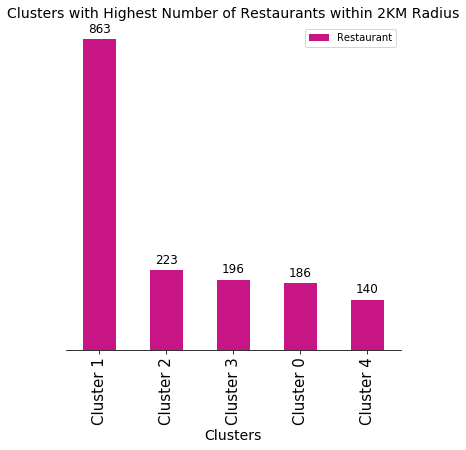

In [215]:
barplot = allclusters.sort_values('Restaurant', ascending = False)
bar = barplot.plot.bar('Cluster','Restaurant', figsize = (6,6), color = 'mediumvioletred')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 12)

bar.set_xlabel('Clusters', fontsize = 14)
bar.set_ylabel('Number of Restaurants', fontsize = 14)
bar.set_title('Clusters with Highest Number of Restaurants within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

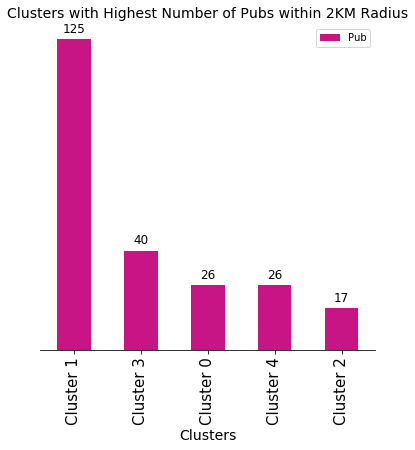

In [216]:
barplot = allclusters.sort_values('Pub', ascending = False)
bar = barplot.plot.bar('Cluster','Pub', figsize = (6,6), color = 'mediumvioletred')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 12)

bar.set_xlabel('Clusters', fontsize = 14)
bar.set_ylabel('Number of Pubs', fontsize = 14)
bar.set_title('Clusters with Highest Number of Pubs within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

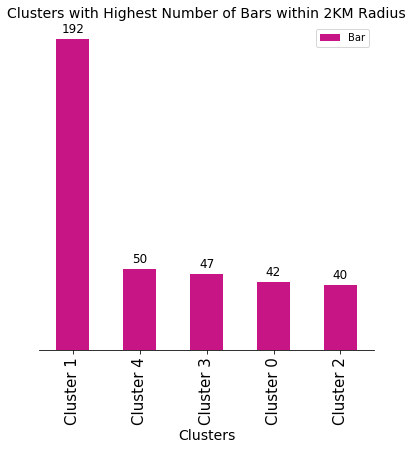

In [217]:
barplot = allclusters.sort_values('Bar', ascending = False)
bar = barplot.plot.bar('Cluster','Bar', figsize = (6,6), color = 'mediumvioletred')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 12)

bar.set_xlabel('Clusters', fontsize = 14)
bar.set_ylabel('Number of Bars', fontsize = 14)
bar.set_title('Clusters with Highest Number of Bars within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

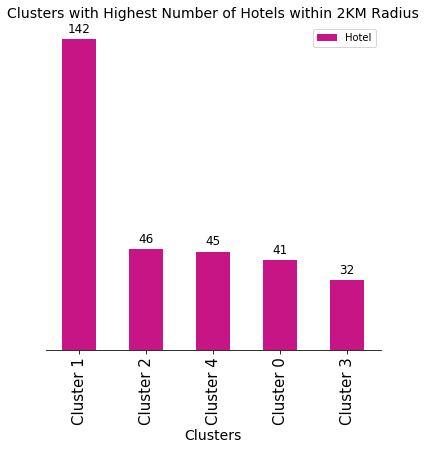

In [218]:
barplot = allclusters.sort_values('Hotel', ascending = False)
bar = barplot.plot.bar('Cluster','Hotel', figsize = (6,6), color = 'mediumvioletred')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 12)

bar.set_xlabel('Clusters', fontsize = 14)
bar.set_ylabel('Number of Hotels', fontsize = 14)
bar.set_title('Clusters with Highest Number of Hotels within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

### Bar Chart Based on Chosen Venues Data

In [3]:
top5europe = pd.read_csv('top5europe.csv')
top5europe.drop('Unnamed: 0', 1, inplace = True)

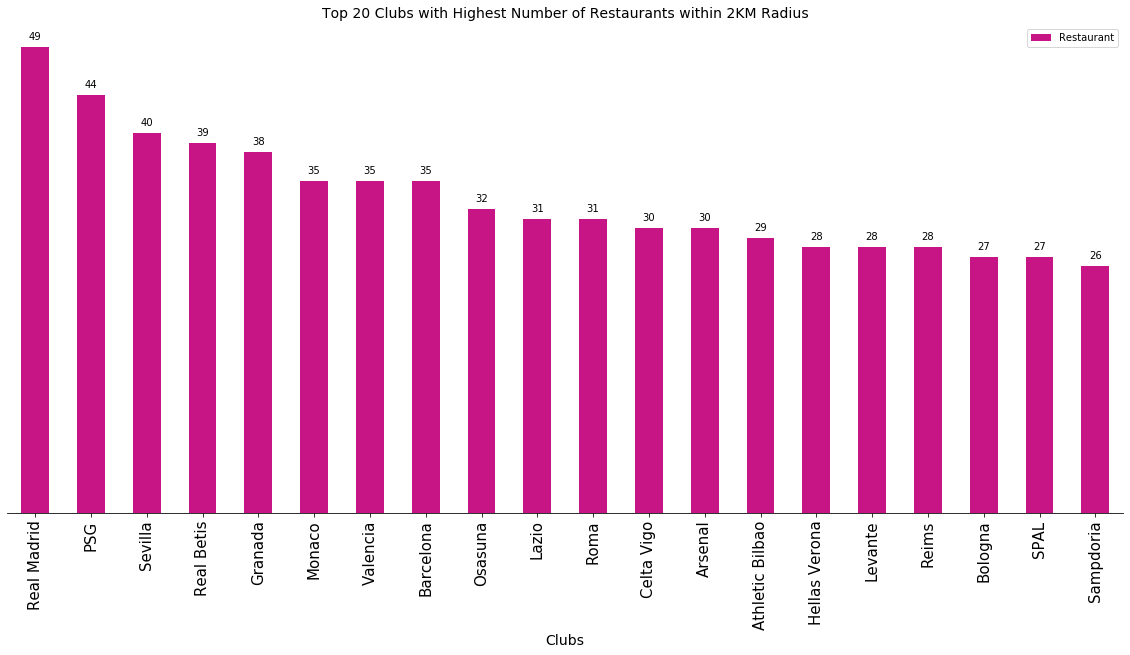

In [4]:
barplot = top5europe.sort_values('Restaurant', ascending = False).head(20)
bar = barplot.plot.bar('Club','Restaurant', figsize = (20,9), color = 'mediumvioletred')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 10)

bar.set_xlabel('Clubs', fontsize = 14)
bar.set_ylabel('Number of Restaurants', fontsize = 14)
bar.set_title('Top 20 Clubs with Highest Number of Restaurants within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

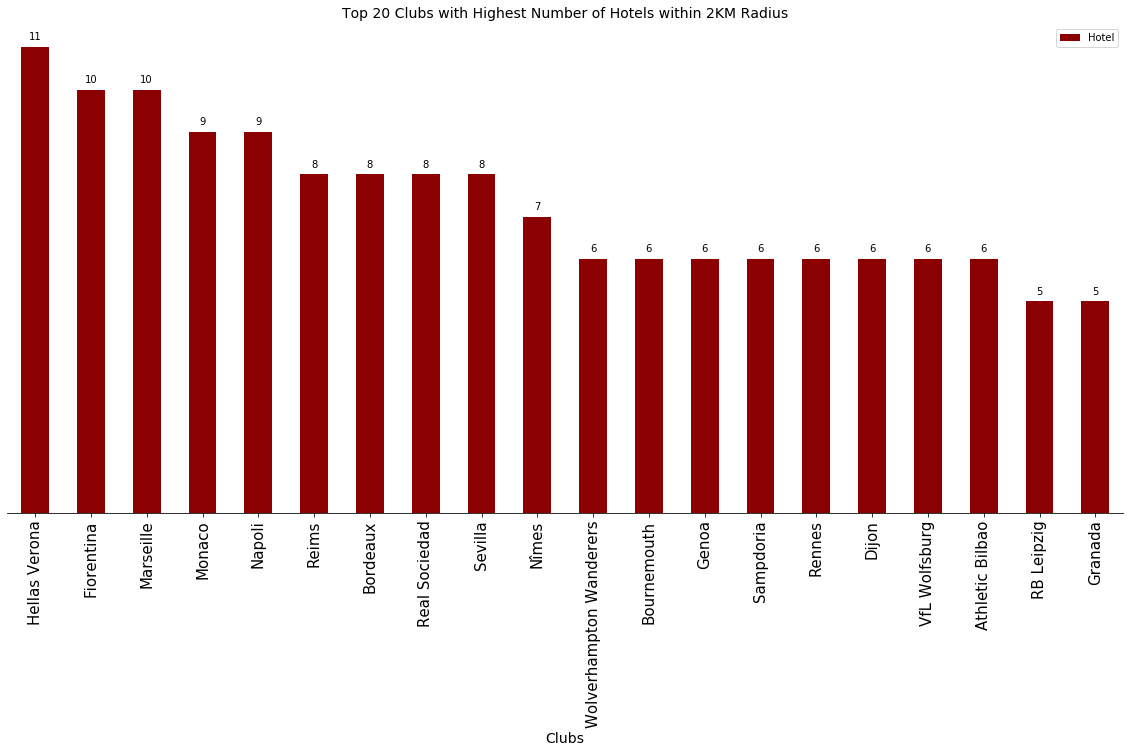

In [537]:
barplot = top5europe.sort_values('Hotel', ascending = False).head(20)
bar = barplot.plot.bar('Club','Hotel', figsize = (20,9), color = 'darkred')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 10)

bar.set_xlabel('Clubs', fontsize = 14)
bar.set_ylabel('Number of Hotels', fontsize = 14)
bar.set_title('Top 20 Clubs with Highest Number of Hotels within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

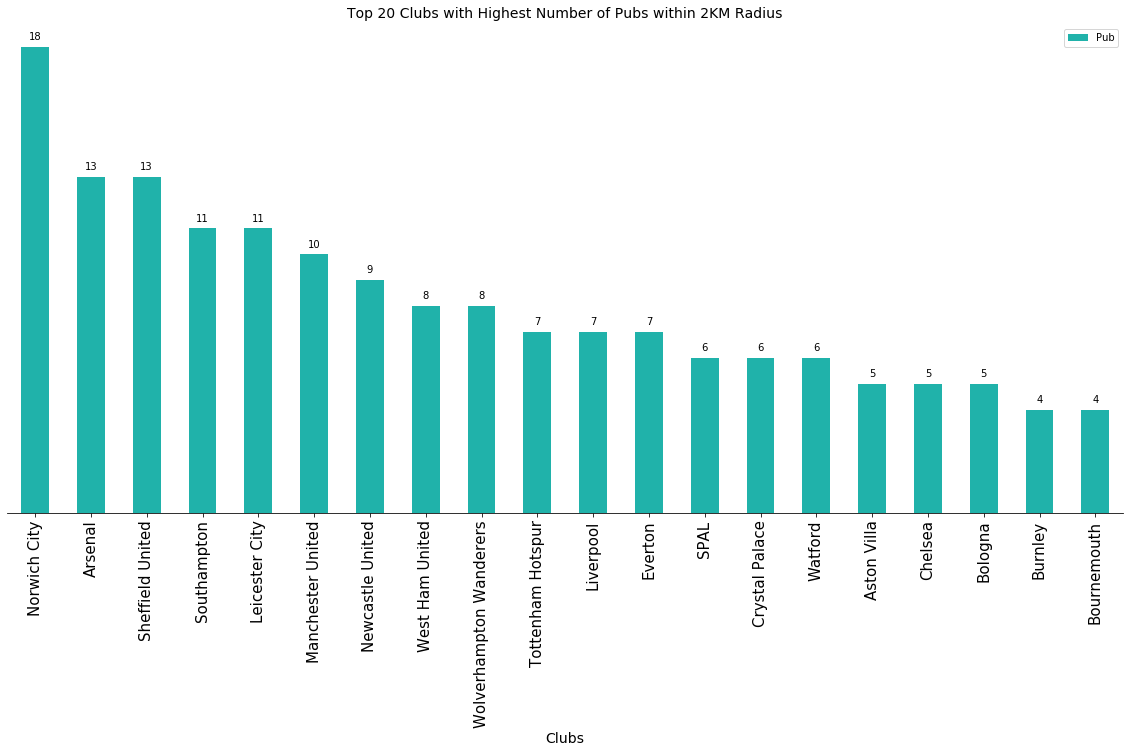

In [539]:
barplot = top5europe.sort_values('Pub', ascending = False).head(20)
bar = barplot.plot.bar('Club','Pub', figsize = (20,9), color = 'lightseagreen')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 10)

bar.set_xlabel('Clubs', fontsize = 14)
bar.set_ylabel('Number of Pubs', fontsize = 14)
bar.set_title('Top 20 Clubs with Highest Number of Pubs within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

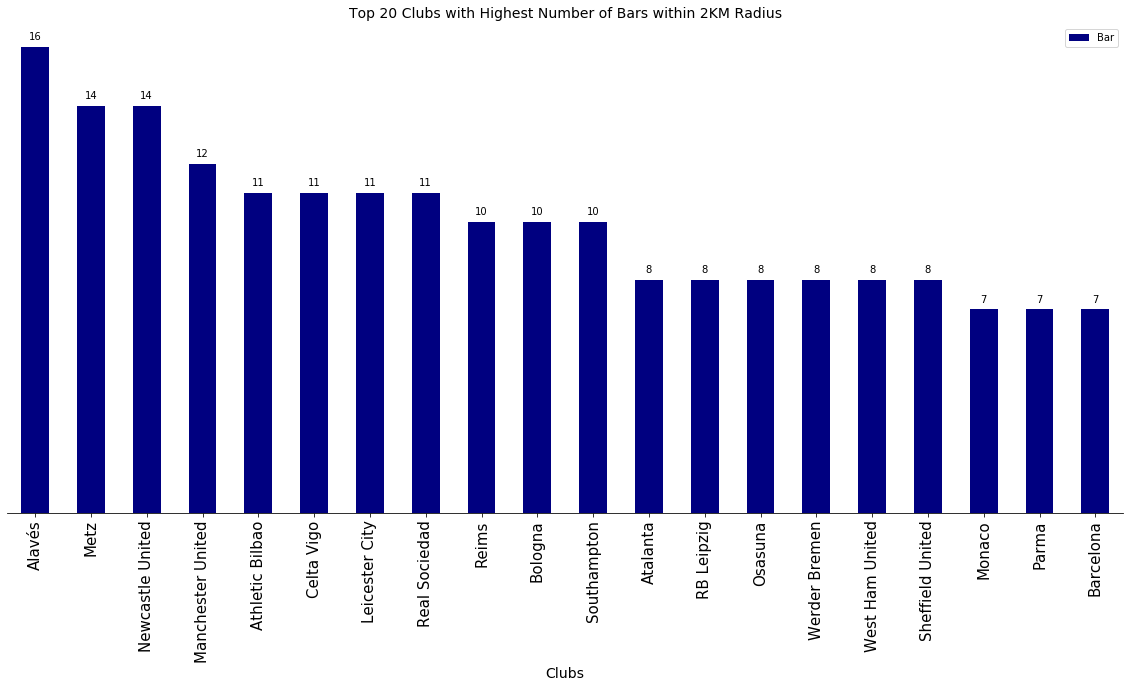

In [540]:
barplot = top5europe.sort_values('Bar', ascending = False).head(20)
bar = barplot.plot.bar('Club','Bar', figsize = (20,9), color = 'navy')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 10)

bar.set_xlabel('Clubs', fontsize = 14)
bar.set_ylabel('Number of Bars', fontsize = 14)
bar.set_title('Top 20 Clubs with Highest Number of Bars within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

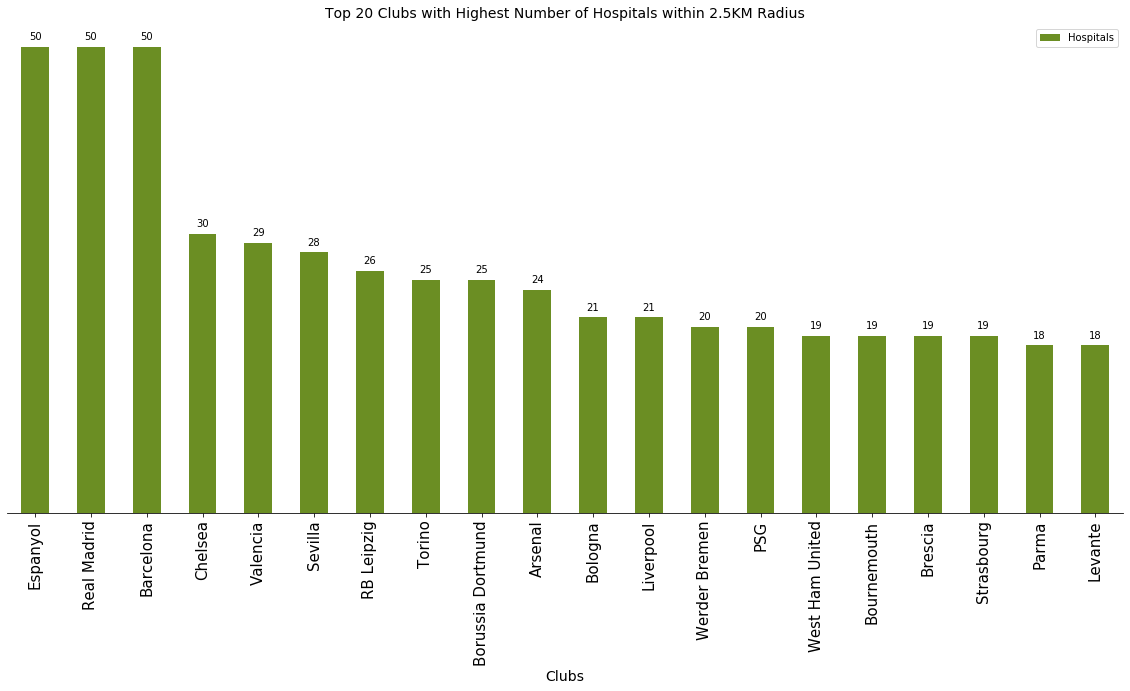

In [544]:
barplot = mergedhospitaldata.sort_values('Hospitals', ascending = False).head(20)
bar = barplot.plot.bar('Club','Hospitals', figsize = (20,9), color = 'olivedrab')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 10)

bar.set_xlabel('Clubs', fontsize = 14)
bar.set_ylabel('Number of Hospitals', fontsize = 14)
bar.set_title('Top 20 Clubs with Highest Number of Hospitals within 2.5KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

In [3]:
epl2019 = pd.read_csv('EPL Cleaned Data 2019-20.csv')
epl2019.drop('Unnamed: 0', 1, inplace = True)

In [4]:
laliga = pd.read_csv('La Liga Cleaned Data 2019-20.csv')
laliga.drop('Unnamed: 0', 1, inplace = True)
laliga = laliga[~laliga.Club.str.contains('Eibar')]

In [5]:
bundesliga = pd.read_csv('Bundesliga Cleaned Data 2019-20.csv')
bundesliga.drop('Unnamed: 0', 1, inplace = True)

In [6]:
seriea = pd.read_csv('Serie A Cleaned Data 2019-20.csv')
seriea.drop('Unnamed: 0', 1, inplace = True)

In [7]:
ligue1 = pd.read_csv('Ligue 1 Cleaned Data 2019-20.csv')
ligue1.drop('Unnamed: 0', 1, inplace = True)

In [8]:
alldata = pd.read_csv('AllData.csv')
alldata.drop('Unnamed: 0', 1, inplace = True)
alldata.drop('Hospitals_x', 1, inplace = True)
alldata.rename(columns={'Hospitals_y':'Hospital'},inplace = True)

In [9]:
epl = epl2019.merge(alldata[['Club','Restaurant','Bar','Pub','Hotel','Hospital']], how ='left',on = 'Club')
england = pd.DataFrame(epl[['Restaurant','Bar','Pub','Hotel','Hospital']].sum(axis = 0, skipna = True))
england = england.transpose()
england.insert(0,'Country','United Kingdom')
england

,Country,Restaurant,Bar,Pub,Hotel,Hospital
0,United Kingdom,288,103,155,39,212


In [10]:
bundesliga = bundesliga.merge(alldata[['Club','Restaurant','Bar','Pub','Hotel','Hospital']], how ='left',on = 'Club')
germany = pd.DataFrame(bundesliga[['Restaurant','Bar','Pub','Hotel','Hospital']].sum(axis = 0, skipna = True))
germany = germany.transpose()
germany.insert(0,'Country','Germany')
germany

,Country,Restaurant,Bar,Pub,Hotel,Hospital
0,Germany,201,32,10,46,118


In [11]:
laliga = laliga.merge(alldata[['Club','Restaurant','Bar','Pub','Hotel','Hospital']], how ='left',on = 'Club')
spain = pd.DataFrame(laliga[['Restaurant','Bar','Pub','Hotel','Hospital']].sum(axis = 0, skipna = True))
spain = spain.transpose()
spain.insert(0,'Country','Spain')
spain

,Country,Restaurant,Bar,Pub,Hotel,Hospital
0,Spain,504,114,20,66,334


In [12]:
seriea = seriea.merge(alldata[['Club','Restaurant','Bar','Pub','Hotel','Hospital']], how ='left',on = 'Club')
italy = pd.DataFrame(seriea[['Restaurant','Bar','Pub','Hotel','Hospital']].sum(axis = 0, skipna = True))
italy = italy.transpose()
italy.insert(0,'Country','Italy')
italy

,Country,Restaurant,Bar,Pub,Hotel,Hospital
0,Italy,385,76,33,78,187


In [13]:
ligue1 = ligue1.merge(alldata[['Club','Restaurant','Bar','Pub','Hotel','Hospital']], how ='left',on = 'Club')
france = pd.DataFrame(ligue1[['Restaurant','Bar','Pub','Hotel','Hospital']].sum(axis = 0, skipna = True))
france = france.transpose()
france.insert(0,'Country','France')
france

,Country,Restaurant,Bar,Pub,Hotel,Hospital
0,France,230,46,16,77,79


In [14]:
countries = pd.concat([england,spain,germany,italy,france], sort = False)
countries.reset_index(drop = True, inplace = True)
countries

,Country,Restaurant,Bar,Pub,Hotel,Hospital
0,United Kingdom,288,103,155,39,212
1,Spain,504,114,20,66,334
2,Germany,201,32,10,46,118
3,Italy,385,76,33,78,187
4,France,230,46,16,77,79


#### Visualization of Bar Graph by Country

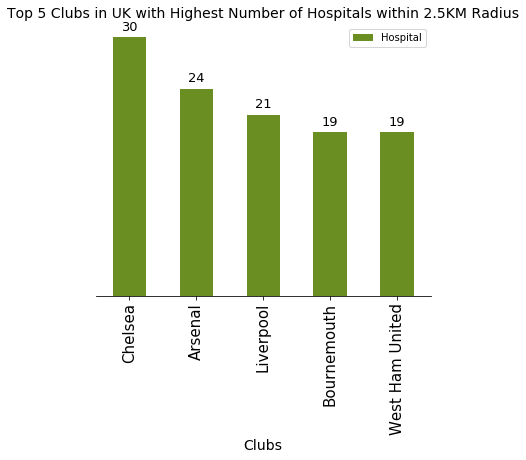

In [160]:
barplot = epl.sort_values('Hospital', ascending = False).head(5)
bar = barplot.plot.bar('Club','Hospital', figsize = (6,5), color = 'olivedrab')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 13)

bar.set_xlabel('Clubs', fontsize = 14)
bar.set_ylabel('Number of Hospitals', fontsize = 14)
bar.set_title('Top 5 Clubs in UK with Highest Number of Hospitals within 2.5KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

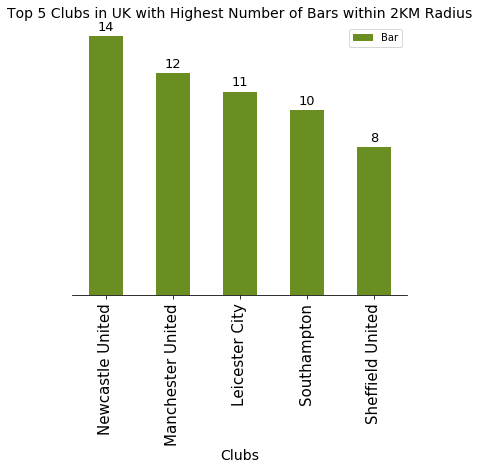

In [172]:
barplot = epl.sort_values('Bar', ascending = False).head(5)
bar = barplot.plot.bar('Club','Bar', figsize = (6,5), color = 'olivedrab')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 13)

bar.set_xlabel('Clubs', fontsize = 14)
bar.set_ylabel('Number of Hospitals', fontsize = 14)
bar.set_title('Top 5 Clubs in UK with Highest Number of Bars within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

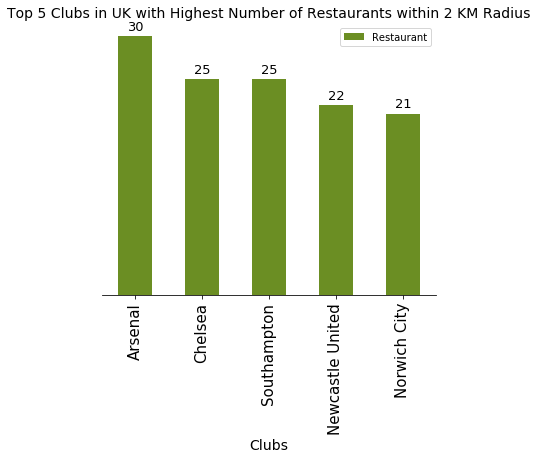

In [171]:
barplot = epl.sort_values('Restaurant', ascending = False).head(5)
bar = barplot.plot.bar('Club','Restaurant', figsize = (6,5), color = 'olivedrab')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 13)

bar.set_xlabel('Clubs', fontsize = 14)
bar.set_ylabel('Number of Hospitals', fontsize = 14)
bar.set_title('Top 5 Clubs in UK with Highest Number of Restaurants within 2 KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

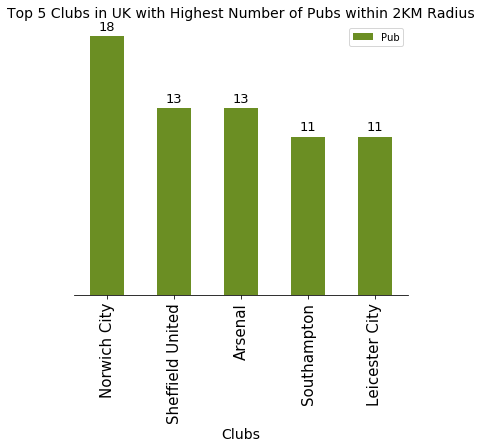

In [170]:
barplot = epl.sort_values('Pub', ascending = False).head(5)
bar = barplot.plot.bar('Club','Pub', figsize = (6,5), color = 'olivedrab')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 13)

bar.set_xlabel('Clubs', fontsize = 14)
bar.set_ylabel('Number of Pubs', fontsize = 14)
bar.set_title('Top 5 Clubs in UK with Highest Number of Pubs within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

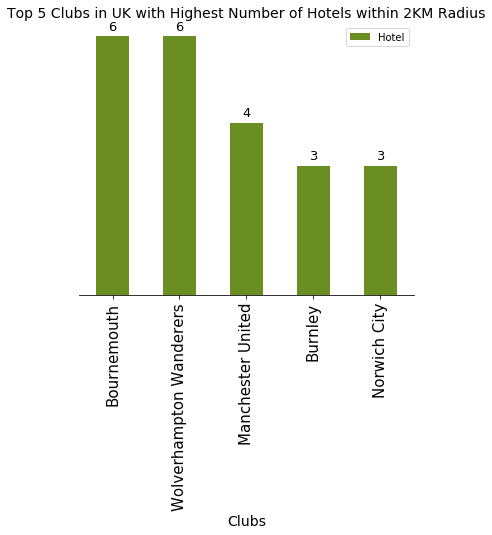

In [169]:
barplot = epl.sort_values('Hotel', ascending = False).head(5)
bar = barplot.plot.bar('Club','Hotel', figsize = (6,5), color = 'olivedrab')
for p in bar.patches:
    bar.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', xytext =(0,10), textcoords ='offset points', fontsize = 13)

bar.set_xlabel('Clubs', fontsize = 14)
bar.set_ylabel('Number of Hospitals', fontsize = 14)
bar.set_title('Top 5 Clubs in UK with Highest Number of Hotels within 2KM Radius', fontsize = 14)
bar.grid(False)
bar.get_yaxis().set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.set_facecolor('white')
plt.xticks(fontsize=15)
plt.show()

In [16]:
a =[]
b = []
for x in countries.Country:
    locator = Nominatim(user_agent ='Stadium Clustering')
    location = locator.geocode(x)
    latitude = location.latitude
    longitude = location.longitude
    a.append(latitude)
    b.append(longitude)

countries['Latitude']=a
countries['Longitude']=b

In [26]:
world_geo = r'world_countries.json'
locator = Nominatim(user_agent ='Stadium Clustering')
location = locator.geocode('France')
latitude = location.latitude
longitude = location.longitude

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(0,
                              countries['Hospital'].max(),
                             6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration



# let Folium determine the scale.
world_map = folium.Map(location=[latitude, longitude], zoom_start=4.4,tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=countries,
    columns=['Country', 'Hospital'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Hospitals',
    nan_fill_color = 'white',
    threshold_scale=threshold_scale,
    reset=True
)
for lat, long, con, hos in zip(countries.Latitude,countries.Longitude,countries.Country, countries.Hospital):
    folium.Marker([lat,long], popup = '{}, Hospitals = {}'.format(con,hos)).add_to(world_map)
    
world_map

In [25]:
world_geo = r'world_countries.json'
locator = Nominatim(user_agent ='Stadium Clustering')
location = locator.geocode('France')
latitude = location.latitude
longitude = location.longitude

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(0,
                              countries['Restaurant'].max(),
                             6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration



# let Folium determine the scale.
world_map = folium.Map(location=[latitude, longitude], zoom_start=4.4, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=countries,
    columns=['Country', 'Restaurant'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Restaurants',
    nan_fill_color = 'white',
    threshold_scale=threshold_scale,
    reset=True
)
for lat, long, con, res in zip(countries.Latitude,countries.Longitude,countries.Country, countries.Restaurant):
    folium.Marker([lat,long], popup = '{}, Restaurants = {}'.format(con,res)).add_to(world_map)
    
world_map

In [24]:
world_geo = r'world_countries.json'
locator = Nominatim(user_agent ='Stadium Clustering')
location = locator.geocode('France')
latitude = location.latitude
longitude = location.longitude

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(0,
                              countries['Pub'].max(),
                             6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration



# let Folium determine the scale.
world_map = folium.Map(location=[latitude, longitude], zoom_start=4.4, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=countries,
    columns=['Country', 'Pub'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Pubs',
    threshold_scale=threshold_scale,
    nan_fill_color = 'white',
    reset=True
)
for lat, long, con, pub in zip(countries.Latitude,countries.Longitude,countries.Country, countries.Pub):
    folium.Marker([lat,long], popup = '{}, Pubs = {}'.format(con,pub)).add_to(world_map)
    
    
world_map

In [23]:
world_geo = r'world_countries.json'
locator = Nominatim(user_agent ='Stadium Clustering')
location = locator.geocode('France')
latitude = location.latitude
longitude = location.longitude

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(0,
                              countries['Bar'].max(),
                             6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration



# let Folium determine the scale.
world_map = folium.Map(location=[latitude, longitude], zoom_start=4.4, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=countries,
    columns=['Country', 'Bar'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Bars',
    threshold_scale=threshold_scale,
    nan_fill_color = 'white',
    reset=True
)
for lat, long, con, bar in zip(countries.Latitude,countries.Longitude,countries.Country, countries.Bar):
    folium.Marker([lat,long], popup = '{}, Bars = {}'.format(con,bar)).add_to(world_map)
    
    
world_map

In [22]:
world_geo = r'world_countries.json'
locator = Nominatim(user_agent ='Stadium Clustering')
location = locator.geocode('France')
latitude = location.latitude
longitude = location.longitude

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(0,
                              countries['Hotel'].max(),
                             6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration



# let Folium determine the scale.
world_map = folium.Map(location=[latitude, longitude], zoom_start=4.4, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=countries,
    columns=['Country', 'Hotel'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Hotels',
    threshold_scale=threshold_scale,
    nan_fill_color = 'white',
    reset=True
)
for lat, long, con, hot in zip(countries.Latitude,countries.Longitude,countries.Country, countries.Hotel):
    folium.Marker([lat,long], popup = '{}, Hotels = {}'.format(con,hot)).add_to(world_map)
    
    
world_map